In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

42


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.52390 stdev: 0.14942
Best fitness: 0.75758 - size: (2, 13) - species 2 - id 8
Average adjusted fitness: 0.277
Mean genetic distance 2.839, standard deviation 0.453
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.479 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63029 stdev: 0.13179
Best fitness: 0.77984 - size: (2, 13) - species 3 - id 285
Average adjusted fitness: 0.317
Mean genetic distance 2.963, standard deviation 0.442
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.830 sec (7.654 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62618 stdev: 0.13923
Best fitness: 0.82189 - size: (3, 14) - species 22 - id 550
Average adjusted fitness: 0.323
Mean genetic distance 3.024, standard deviation 0.430
Population of 200 members in 33 species
T

Population's average fitness: 0.71219 stdev: 0.10788
Best fitness: 0.83364 - size: (12, 32) - species 13 - id 3397
Average adjusted fitness: 0.412
Mean genetic distance 3.225, standard deviation 0.529
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 11.029 sec (10.703 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.70363 stdev: 0.11931
Best fitness: 0.83364 - size: (12, 32) - species 13 - id 3397
Average adjusted fitness: 0.434
Mean genetic distance 3.260, standard deviation 0.534
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 11.080 sec (10.823 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69857 stdev: 0.12571
Best fitness: 0.83364 - size: (12, 32) - species 13 - id 3397
Average adjusted fitness: 0.398
Mean genetic distance 3.257, standard deviation 0.535
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 11.506 sec (10.861 average)

Population's average fitness: 0.69674 stdev: 0.13043
Best fitness: 0.86271 - size: (7, 21) - species 41 - id 2060
Average adjusted fitness: 0.396
Mean genetic distance 3.260, standard deviation 0.452
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 18.943 sec (16.581 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70990 stdev: 0.12657
Best fitness: 0.86827 - size: (6, 19) - species 3 - id 2648
Average adjusted fitness: 0.469
Mean genetic distance 3.250, standard deviation 0.452
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 20.155 sec (17.281 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70925 stdev: 0.14373
Best fitness: 0.86827 - size: (6, 19) - species 3 - id 2648
Average adjusted fitness: 0.408
Mean genetic distance 3.254, standard deviation 0.481
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 16.927 sec (17.381 average)

 **

Population's average fitness: 0.84531 stdev: 0.15402
Best fitness: 0.98021 - size: (7, 22) - species 8 - id 1830
Average adjusted fitness: 0.729
Mean genetic distance 3.144, standard deviation 0.537
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 21.914 sec (22.465 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.83895 stdev: 0.15198
Best fitness: 0.98083 - size: (8, 22) - species 23 - id 1951
Average adjusted fitness: 0.717
Mean genetic distance 3.132, standard deviation 0.531
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 25.898 sec (22.795 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.85378 stdev: 0.15390
Best fitness: 0.98083 - size: (8, 22) - species 23 - id 1951
Average adjusted fitness: 0.738
Mean genetic distance 3.136, standard deviation 0.531
Population of 211 members in 42 species
Total extinctions: 0
Generation time: 21.483 sec (22.539 average)

 *

Population's average fitness: 0.65802 stdev: 0.10381
Best fitness: 0.78169 - size: (5, 18) - species 22 - id 937
Average adjusted fitness: 0.354
Mean genetic distance 3.170, standard deviation 0.504
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 22.462 sec (24.275 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66893 stdev: 0.08272
Best fitness: 0.78169 - size: (5, 18) - species 22 - id 937
Average adjusted fitness: 0.362
Mean genetic distance 3.177, standard deviation 0.508
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 22.527 sec (24.056 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66233 stdev: 0.10259
Best fitness: 0.78169 - size: (5, 18) - species 22 - id 937
Average adjusted fitness: 0.359
Mean genetic distance 3.185, standard deviation 0.506
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 22.484 sec (23.882 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47892 stdev: 0.09113
Best fitness: 0.70068 - size: (2, 13) - species 2 - id 20
Average adjusted fitness: 0.167
Mean genetic distance 2.872, standard deviation 0.459
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.883 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54290 stdev: 0.09430
Best fitness: 0.76129 - size: (3, 15) - species 14 - id 307
Average adjusted fitness: 0.203
Mean genetic distance 2.989, standard deviation 0.446
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.876 sec (18.380 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55088 stdev: 0.09938
Best fitness: 0.76129 - size: (3, 15) - species 14 - id 307
Average adjusted fitness: 0.204
Mean genetic distance 3.023, standard deviation 0.442
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 20.260 sec (19.

Population's average fitness: 0.64005 stdev: 0.09891
Best fitness: 0.79159 - size: (7, 24) - species 39 - id 3309
Average adjusted fitness: 0.272
Mean genetic distance 3.259, standard deviation 0.489
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 25.664 sec (24.419 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64771 stdev: 0.08701
Best fitness: 0.79159 - size: (7, 24) - species 39 - id 3309
Average adjusted fitness: 0.247
Mean genetic distance 3.290, standard deviation 0.476
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 25.911 sec (24.704 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64342 stdev: 0.10359
Best fitness: 0.79159 - size: (7, 24) - species 39 - id 3309
Average adjusted fitness: 0.261
Mean genetic distance 3.304, standard deviation 0.491
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 24.602 sec (24.831 average)

 

Population's average fitness: 0.63295 stdev: 0.09639
Best fitness: 0.81323 - size: (5, 17) - species 33 - id 1973
Average adjusted fitness: 0.169
Mean genetic distance 3.199, standard deviation 0.513
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 23.638 sec (23.501 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62871 stdev: 0.10246
Best fitness: 0.81694 - size: (6, 19) - species 33 - id 2719
Average adjusted fitness: 0.182
Mean genetic distance 3.196, standard deviation 0.524
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.708 sec (23.652 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62950 stdev: 0.10385
Best fitness: 0.81694 - size: (6, 19) - species 33 - id 2719
Average adjusted fitness: 0.312
Mean genetic distance 3.220, standard deviation 0.514
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 24.305 sec (23.818 average)

 

Population's average fitness: 0.76888 stdev: 0.14423
Best fitness: 0.92270 - size: (5, 17) - species 15 - id 657
Average adjusted fitness: 0.568
Mean genetic distance 3.161, standard deviation 0.486
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 24.300 sec (22.702 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.78327 stdev: 0.12222
Best fitness: 0.92270 - size: (5, 17) - species 15 - id 657
Average adjusted fitness: 0.572
Mean genetic distance 3.177, standard deviation 0.483
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 24.020 sec (23.006 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74163 stdev: 0.18705
Best fitness: 0.92270 - size: (5, 17) - species 15 - id 657
Average adjusted fitness: 0.552
Mean genetic distance 3.169, standard deviation 0.479
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 24.244 sec (23.274 average)

 ***

Population's average fitness: 0.58068 stdev: 0.07335
Best fitness: 0.72418 - size: (6, 21) - species 26 - id 971
Average adjusted fitness: 0.238
Mean genetic distance 3.131, standard deviation 0.473
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 22.133 sec (20.280 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58750 stdev: 0.07645
Best fitness: 0.72418 - size: (6, 21) - species 26 - id 971
Average adjusted fitness: 0.248
Mean genetic distance 3.119, standard deviation 0.457
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 21.877 sec (20.480 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59733 stdev: 0.07352
Best fitness: 0.74212 - size: (5, 18) - species 6 - id 1325
Average adjusted fitness: 0.217
Mean genetic distance 3.141, standard deviation 0.462
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 23.332 sec (20.797 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50559 stdev: 0.04839
Best fitness: 0.63822 - size: (2, 13) - species 3 - id 43
Average adjusted fitness: 0.123
Mean genetic distance 2.946, standard deviation 0.483
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.795 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52657 stdev: 0.05072
Best fitness: 0.66543 - size: (3, 15) - species 3 - id 331
Average adjusted fitness: 0.174
Mean genetic distance 3.021, standard deviation 0.512
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.965 sec (18.380 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53693 stdev: 0.04928
Best fitness: 0.66543 - size: (3, 15) - species 3 - id 331
Average adjusted fitness: 0.139
Mean genetic distance 3.055, standard deviation 0.471
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.275 sec (19.01

Population's average fitness: 0.58965 stdev: 0.06546
Best fitness: 0.70501 - size: (9, 27) - species 39 - id 3151
Average adjusted fitness: 0.148
Mean genetic distance 3.187, standard deviation 0.526
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 25.629 sec (24.804 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58663 stdev: 0.06695
Best fitness: 0.70501 - size: (9, 27) - species 39 - id 3151
Average adjusted fitness: 0.142
Mean genetic distance 3.200, standard deviation 0.524
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 26.202 sec (24.993 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58549 stdev: 0.06748
Best fitness: 0.70501 - size: (9, 27) - species 39 - id 3151
Average adjusted fitness: 0.205
Mean genetic distance 3.210, standard deviation 0.530
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 26.487 sec (25.196 average)

 

Population's average fitness: 0.71619 stdev: 0.17502
Best fitness: 0.88250 - size: (2, 13) - species 1 - id 200
Average adjusted fitness: 0.520
Mean genetic distance 3.167, standard deviation 0.534
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 23.691 sec (23.746 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70659 stdev: 0.18511
Best fitness: 0.88250 - size: (2, 13) - species 1 - id 200
Average adjusted fitness: 0.519
Mean genetic distance 3.183, standard deviation 0.552
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 23.250 sec (23.777 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73843 stdev: 0.14537
Best fitness: 0.89672 - size: (4, 17) - species 27 - id 3044
Average adjusted fitness: 0.536
Mean genetic distance 3.194, standard deviation 0.552
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 24.446 sec (23.940 average)

 ****

Population's average fitness: 0.61113 stdev: 0.09963
Best fitness: 0.77180 - size: (7, 21) - species 34 - id 1248
Average adjusted fitness: 0.269
Mean genetic distance 3.197, standard deviation 0.486
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 23.749 sec (22.627 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61896 stdev: 0.09480
Best fitness: 0.77180 - size: (7, 21) - species 34 - id 1248
Average adjusted fitness: 0.254
Mean genetic distance 3.222, standard deviation 0.478
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 24.085 sec (22.929 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61129 stdev: 0.09485
Best fitness: 0.77180 - size: (7, 21) - species 34 - id 1248
Average adjusted fitness: 0.256
Mean genetic distance 3.211, standard deviation 0.484
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 24.200 sec (23.183 average)

 

Population's average fitness: 0.62345 stdev: 0.09151
Best fitness: 0.78541 - size: (4, 16) - species 5 - id 626
Average adjusted fitness: 0.303
Mean genetic distance 3.145, standard deviation 0.496
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.001 sec (20.579 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61736 stdev: 0.10212
Best fitness: 0.78541 - size: (4, 16) - species 5 - id 626
Average adjusted fitness: 0.329
Mean genetic distance 3.174, standard deviation 0.487
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 23.159 sec (20.902 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62842 stdev: 0.09124
Best fitness: 0.79159 - size: (5, 17) - species 5 - id 1339
Average adjusted fitness: 0.240
Mean genetic distance 3.189, standard deviation 0.481
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 21.998 sec (21.023 average)

 ****** 


 ****** Running generation 0 ****** 

Population's average fitness: 0.45110 stdev: 0.20362
Best fitness: 0.80087 - size: (2, 13) - species 2 - id 21
Average adjusted fitness: 0.264
Mean genetic distance 2.875, standard deviation 0.474
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.936 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59244 stdev: 0.19723
Best fitness: 0.83612 - size: (2, 14) - species 9 - id 218
Average adjusted fitness: 0.380
Mean genetic distance 2.912, standard deviation 0.486
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 19.134 sec (18.535 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66738 stdev: 0.17369
Best fitness: 0.86642 - size: (4, 16) - species 2 - id 495
Average adjusted fitness: 0.434
Mean genetic distance 2.923, standard deviation 0.482
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.631 sec (18.90

Population's average fitness: 0.68223 stdev: 0.18856
Best fitness: 0.88312 - size: (8, 26) - species 28 - id 3585
Average adjusted fitness: 0.463
Mean genetic distance 3.048, standard deviation 0.503
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 24.813 sec (24.627 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69225 stdev: 0.18734
Best fitness: 0.88312 - size: (8, 26) - species 28 - id 3585
Average adjusted fitness: 0.470
Mean genetic distance 3.064, standard deviation 0.513
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 25.644 sec (24.656 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69299 stdev: 0.18525
Best fitness: 0.88312 - size: (8, 26) - species 28 - id 3585
Average adjusted fitness: 0.478
Mean genetic distance 3.054, standard deviation 0.522
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 25.577 sec (24.653 average)

 

Population's average fitness: 0.59993 stdev: 0.07237
Best fitness: 0.73964 - size: (4, 15) - species 36 - id 1649
Average adjusted fitness: 0.164
Mean genetic distance 3.267, standard deviation 0.466
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 23.026 sec (23.097 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60092 stdev: 0.07095
Best fitness: 0.73964 - size: (4, 15) - species 36 - id 1649
Average adjusted fitness: 0.172
Mean genetic distance 3.256, standard deviation 0.482
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 24.031 sec (23.191 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60739 stdev: 0.07324
Best fitness: 0.76623 - size: (5, 16) - species 36 - id 2758
Average adjusted fitness: 0.233
Mean genetic distance 3.259, standard deviation 0.492
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 25.238 sec (23.452 average)

 

Population's average fitness: 0.62715 stdev: 0.08584
Best fitness: 0.80705 - size: (8, 26) - species 17 - id 1485
Average adjusted fitness: 0.287
Mean genetic distance 3.150, standard deviation 0.489
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 24.141 sec (23.367 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62356 stdev: 0.08980
Best fitness: 0.80705 - size: (8, 26) - species 17 - id 1485
Average adjusted fitness: 0.256
Mean genetic distance 3.162, standard deviation 0.485
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 24.177 sec (23.689 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62801 stdev: 0.08524
Best fitness: 0.80705 - size: (8, 26) - species 17 - id 1485
Average adjusted fitness: 0.163
Mean genetic distance 3.183, standard deviation 0.491
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 24.065 sec (23.937 average)

 

Population's average fitness: 0.59181 stdev: 0.07387
Best fitness: 0.73408 - size: (5, 17) - species 7 - id 961
Average adjusted fitness: 0.228
Mean genetic distance 3.194, standard deviation 0.502
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 22.233 sec (20.763 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58573 stdev: 0.08589
Best fitness: 0.73408 - size: (5, 17) - species 7 - id 961
Average adjusted fitness: 0.285
Mean genetic distance 3.199, standard deviation 0.503
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 23.292 sec (21.079 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59028 stdev: 0.08141
Best fitness: 0.73408 - size: (5, 17) - species 7 - id 961
Average adjusted fitness: 0.257
Mean genetic distance 3.207, standard deviation 0.511
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 22.841 sec (21.275 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47865 stdev: 0.08843
Best fitness: 0.67409 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.184
Mean genetic distance 2.885, standard deviation 0.496
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.832 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51687 stdev: 0.08841
Best fitness: 0.69635 - size: (2, 14) - species 5 - id 240
Average adjusted fitness: 0.168
Mean genetic distance 3.006, standard deviation 0.502
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.123 sec (18.477 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54228 stdev: 0.08811
Best fitness: 0.69635 - size: (2, 14) - species 5 - id 240
Average adjusted fitness: 0.174
Mean genetic distance 3.037, standard deviation 0.494
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.070 sec (19.00

Population's average fitness: 0.61759 stdev: 0.09208
Best fitness: 0.76005 - size: (5, 19) - species 40 - id 1976
Average adjusted fitness: 0.269
Mean genetic distance 3.251, standard deviation 0.481
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 26.465 sec (25.535 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61543 stdev: 0.09295
Best fitness: 0.76005 - size: (5, 19) - species 14 - id 1976
Average adjusted fitness: 0.246
Mean genetic distance 3.262, standard deviation 0.476
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 25.835 sec (25.657 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61292 stdev: 0.09316
Best fitness: 0.76005 - size: (5, 19) - species 44 - id 1976
Average adjusted fitness: 0.229
Mean genetic distance 3.271, standard deviation 0.477
Population of 187 members in 35 species
Total extinctions: 0
Generation time: 26.682 sec (25.864 average)

 

Population's average fitness: 0.61044 stdev: 0.07142
Best fitness: 0.76562 - size: (4, 18) - species 34 - id 2657
Average adjusted fitness: 0.175
Mean genetic distance 3.310, standard deviation 0.493
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 24.574 sec (24.067 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60518 stdev: 0.07584
Best fitness: 0.76562 - size: (4, 18) - species 34 - id 2657
Average adjusted fitness: 0.192
Mean genetic distance 3.292, standard deviation 0.498
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 24.458 sec (24.215 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60864 stdev: 0.07173
Best fitness: 0.76562 - size: (4, 18) - species 34 - id 2657
Average adjusted fitness: 0.158
Mean genetic distance 3.300, standard deviation 0.502
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 25.287 sec (24.399 average)

 

Population's average fitness: 0.60337 stdev: 0.07312
Best fitness: 0.77675 - size: (4, 18) - species 31 - id 1102
Average adjusted fitness: 0.235
Mean genetic distance 3.081, standard deviation 0.455
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 23.809 sec (22.809 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60264 stdev: 0.07365
Best fitness: 0.77675 - size: (4, 18) - species 31 - id 1102
Average adjusted fitness: 0.178
Mean genetic distance 3.069, standard deviation 0.463
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 24.983 sec (23.222 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60295 stdev: 0.07431
Best fitness: 0.77675 - size: (4, 18) - species 31 - id 1102
Average adjusted fitness: 0.250
Mean genetic distance 3.066, standard deviation 0.452
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 24.863 sec (23.507 average)

 

Population's average fitness: 0.61875 stdev: 0.11251
Best fitness: 0.81447 - size: (3, 16) - species 40 - id 674
Average adjusted fitness: 0.289
Mean genetic distance 3.182, standard deviation 0.466
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 22.655 sec (20.706 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63159 stdev: 0.10775
Best fitness: 0.81447 - size: (3, 16) - species 40 - id 674
Average adjusted fitness: 0.264
Mean genetic distance 3.168, standard deviation 0.468
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 22.890 sec (20.979 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62601 stdev: 0.11054
Best fitness: 0.81447 - size: (3, 16) - species 40 - id 674
Average adjusted fitness: 0.239
Mean genetic distance 3.153, standard deviation 0.474
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 22.340 sec (21.130 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.52815 stdev: 0.07430
Best fitness: 0.66605 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.187
Mean genetic distance 2.850, standard deviation 0.469
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.271 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56408 stdev: 0.06769
Best fitness: 0.69882 - size: (3, 15) - species 6 - id 384
Average adjusted fitness: 0.195
Mean genetic distance 2.946, standard deviation 0.479
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 19.631 sec (18.951 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56514 stdev: 0.07689
Best fitness: 0.71243 - size: (4, 15) - species 9 - id 434
Average adjusted fitness: 0.283
Mean genetic distance 3.030, standard deviation 0.470
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 20.567 sec (19.4

Population's average fitness: 0.60718 stdev: 0.10013
Best fitness: 0.77798 - size: (7, 22) - species 17 - id 2093
Average adjusted fitness: 0.273
Mean genetic distance 3.245, standard deviation 0.519
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 24.702 sec (24.974 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62274 stdev: 0.08765
Best fitness: 0.77798 - size: (7, 22) - species 17 - id 2093
Average adjusted fitness: 0.226
Mean genetic distance 3.227, standard deviation 0.506
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 24.953 sec (25.043 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62640 stdev: 0.08978
Best fitness: 0.77798 - size: (7, 22) - species 17 - id 2093
Average adjusted fitness: 0.297
Mean genetic distance 3.223, standard deviation 0.502
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 26.788 sec (25.148 average)

 

Population's average fitness: 0.70548 stdev: 0.13433
Best fitness: 0.84539 - size: (5, 21) - species 13 - id 1484
Average adjusted fitness: 0.403
Mean genetic distance 3.217, standard deviation 0.479
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 26.224 sec (24.774 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70495 stdev: 0.13531
Best fitness: 0.84539 - size: (5, 21) - species 13 - id 1484
Average adjusted fitness: 0.480
Mean genetic distance 3.240, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 25.290 sec (24.907 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70625 stdev: 0.13076
Best fitness: 0.84539 - size: (5, 21) - species 13 - id 1484
Average adjusted fitness: 0.408
Mean genetic distance 3.216, standard deviation 0.481
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 26.202 sec (25.133 average)

 

Population's average fitness: 0.65200 stdev: 0.12331
Best fitness: 0.78231 - size: (6, 21) - species 2 - id 1764
Average adjusted fitness: 0.347
Mean genetic distance 3.090, standard deviation 0.496
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 23.506 sec (22.758 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64738 stdev: 0.13252
Best fitness: 0.78231 - size: (6, 21) - species 2 - id 1764
Average adjusted fitness: 0.351
Mean genetic distance 3.099, standard deviation 0.504
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.766 sec (22.852 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64630 stdev: 0.13335
Best fitness: 0.78231 - size: (6, 21) - species 2 - id 1764
Average adjusted fitness: 0.342
Mean genetic distance 3.108, standard deviation 0.496
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 23.567 sec (22.942 average)

 ***

Population's average fitness: 0.59232 stdev: 0.06893
Best fitness: 0.73531 - size: (4, 16) - species 19 - id 1003
Average adjusted fitness: 0.200
Mean genetic distance 3.122, standard deviation 0.481
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 23.070 sec (21.027 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59259 stdev: 0.07164
Best fitness: 0.73531 - size: (4, 16) - species 19 - id 1003
Average adjusted fitness: 0.213
Mean genetic distance 3.115, standard deviation 0.484
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 22.669 sec (21.232 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59149 stdev: 0.07449
Best fitness: 0.73531 - size: (4, 16) - species 19 - id 1003
Average adjusted fitness: 0.220
Mean genetic distance 3.142, standard deviation 0.482
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 22.743 sec (21.400 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47317 stdev: 0.08382
Best fitness: 0.66419 - size: (2, 13) - species 7 - id 157
Average adjusted fitness: 0.188
Mean genetic distance 2.978, standard deviation 0.535
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.477 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53442 stdev: 0.09108
Best fitness: 0.68955 - size: (3, 15) - species 23 - id 378
Average adjusted fitness: 0.265
Mean genetic distance 3.115, standard deviation 0.536
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.860 sec (19.168 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55793 stdev: 0.08323
Best fitness: 0.70006 - size: (3, 15) - species 10 - id 397
Average adjusted fitness: 0.251
Mean genetic distance 3.148, standard deviation 0.504
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.527 sec (19

Population's average fitness: 0.64281 stdev: 0.09972
Best fitness: 0.76994 - size: (8, 23) - species 40 - id 3085
Average adjusted fitness: 0.245
Mean genetic distance 3.270, standard deviation 0.499
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 26.525 sec (25.597 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63663 stdev: 0.11011
Best fitness: 0.76994 - size: (8, 23) - species 40 - id 3085
Average adjusted fitness: 0.253
Mean genetic distance 3.263, standard deviation 0.498
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 26.767 sec (25.801 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63553 stdev: 0.11025
Best fitness: 0.76994 - size: (8, 23) - species 40 - id 3085
Average adjusted fitness: 0.267
Mean genetic distance 3.274, standard deviation 0.502
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 27.372 sec (26.005 average)

 

Population's average fitness: 0.65439 stdev: 0.11514
Best fitness: 0.82375 - size: (7, 25) - species 29 - id 2381
Average adjusted fitness: 0.380
Mean genetic distance 3.182, standard deviation 0.515
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 24.456 sec (24.348 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65098 stdev: 0.11668
Best fitness: 0.82375 - size: (7, 25) - species 29 - id 2381
Average adjusted fitness: 0.328
Mean genetic distance 3.180, standard deviation 0.512
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 24.382 sec (24.358 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64329 stdev: 0.12633
Best fitness: 0.82375 - size: (7, 25) - species 29 - id 2381
Average adjusted fitness: 0.311
Mean genetic distance 3.174, standard deviation 0.506
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 24.892 sec (24.471 average)

 

Population's average fitness: 0.59389 stdev: 0.07163
Best fitness: 0.71738 - size: (5, 17) - species 12 - id 1327
Average adjusted fitness: 0.177
Mean genetic distance 3.205, standard deviation 0.475
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 23.963 sec (22.966 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59702 stdev: 0.07039
Best fitness: 0.71738 - size: (5, 17) - species 12 - id 1327
Average adjusted fitness: 0.175
Mean genetic distance 3.216, standard deviation 0.474
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 24.395 sec (23.284 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59068 stdev: 0.07310
Best fitness: 0.71738 - size: (5, 17) - species 12 - id 1327
Average adjusted fitness: 0.237
Mean genetic distance 3.220, standard deviation 0.478
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 24.515 sec (23.561 average)

 

Population's average fitness: 0.61802 stdev: 0.10904
Best fitness: 0.86209 - size: (4, 16) - species 6 - id 519
Average adjusted fitness: 0.267
Mean genetic distance 3.206, standard deviation 0.499
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 23.787 sec (21.641 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63143 stdev: 0.11208
Best fitness: 0.86209 - size: (4, 16) - species 6 - id 519
Average adjusted fitness: 0.380
Mean genetic distance 3.196, standard deviation 0.496
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 23.686 sec (21.897 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63869 stdev: 0.10223
Best fitness: 0.86209 - size: (4, 16) - species 6 - id 519
Average adjusted fitness: 0.259
Mean genetic distance 3.165, standard deviation 0.493
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 24.592 sec (22.196 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47459 stdev: 0.11173
Best fitness: 0.77365 - size: (2, 13) - species 5 - id 166
Average adjusted fitness: 0.283
Mean genetic distance 2.912, standard deviation 0.505
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 18.425 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55982 stdev: 0.10832
Best fitness: 0.77365 - size: (2, 13) - species 9 - id 166
Average adjusted fitness: 0.269
Mean genetic distance 3.004, standard deviation 0.491
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.926 sec (19.176 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57885 stdev: 0.10188
Best fitness: 0.77365 - size: (2, 13) - species 6 - id 166
Average adjusted fitness: 0.273
Mean genetic distance 3.026, standard deviation 0.493
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.905 sec (19.7

Population's average fitness: 0.66263 stdev: 0.11534
Best fitness: 0.81509 - size: (6, 20) - species 1 - id 2546
Average adjusted fitness: 0.357
Mean genetic distance 3.159, standard deviation 0.530
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 25.128 sec (24.688 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64461 stdev: 0.12350
Best fitness: 0.81509 - size: (6, 20) - species 1 - id 2546
Average adjusted fitness: 0.249
Mean genetic distance 3.171, standard deviation 0.528
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 25.406 sec (24.846 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65790 stdev: 0.11853
Best fitness: 0.81509 - size: (6, 20) - species 1 - id 2546
Average adjusted fitness: 0.287
Mean genetic distance 3.183, standard deviation 0.529
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 26.679 sec (25.213 average)

 ***

Population's average fitness: 0.64249 stdev: 0.07178
Best fitness: 0.78973 - size: (4, 20) - species 36 - id 1842
Average adjusted fitness: 0.245
Mean genetic distance 3.239, standard deviation 0.509
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 25.039 sec (24.031 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63356 stdev: 0.08278
Best fitness: 0.78973 - size: (4, 20) - species 36 - id 1842
Average adjusted fitness: 0.283
Mean genetic distance 3.216, standard deviation 0.513
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 25.236 sec (24.261 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62977 stdev: 0.09044
Best fitness: 0.78973 - size: (4, 20) - species 36 - id 1842
Average adjusted fitness: 0.234
Mean genetic distance 3.245, standard deviation 0.531
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 24.494 sec (24.416 average)

 

Population's average fitness: 0.64388 stdev: 0.10300
Best fitness: 0.83550 - size: (7, 21) - species 18 - id 1714
Average adjusted fitness: 0.296
Mean genetic distance 3.210, standard deviation 0.470
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 23.453 sec (22.697 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64603 stdev: 0.10203
Best fitness: 0.83550 - size: (7, 21) - species 18 - id 1714
Average adjusted fitness: 0.298
Mean genetic distance 3.216, standard deviation 0.471
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 22.993 sec (22.886 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65112 stdev: 0.10128
Best fitness: 0.83550 - size: (7, 21) - species 18 - id 1714
Average adjusted fitness: 0.310
Mean genetic distance 3.211, standard deviation 0.469
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 23.683 sec (23.026 average)

 

Population's average fitness: 0.59203 stdev: 0.10981
Best fitness: 0.82004 - size: (2, 13) - species 31 - id 16
Average adjusted fitness: 0.365
Mean genetic distance 3.165, standard deviation 0.494
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 22.865 sec (20.842 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59440 stdev: 0.10996
Best fitness: 0.83241 - size: (2, 12) - species 20 - id 1177
Average adjusted fitness: 0.295
Mean genetic distance 3.137, standard deviation 0.480
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 22.379 sec (21.034 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60647 stdev: 0.10756
Best fitness: 0.83241 - size: (2, 12) - species 20 - id 1177
Average adjusted fitness: 0.282
Mean genetic distance 3.149, standard deviation 0.497
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 22.583 sec (21.206 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47981 stdev: 0.08620
Best fitness: 0.66110 - size: (2, 13) - species 2 - id 83
Average adjusted fitness: 0.157
Mean genetic distance 2.994, standard deviation 0.497
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.696 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53176 stdev: 0.08458
Best fitness: 0.66110 - size: (2, 13) - species 2 - id 83
Average adjusted fitness: 0.184
Mean genetic distance 3.030, standard deviation 0.475
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 19.511 sec (19.603 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55138 stdev: 0.07978
Best fitness: 0.69821 - size: (2, 14) - species 2 - id 528
Average adjusted fitness: 0.201
Mean genetic distance 3.068, standard deviation 0.486
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 20.704 sec (19.970

Population's average fitness: 0.59301 stdev: 0.09123
Best fitness: 0.77613 - size: (4, 17) - species 48 - id 1817
Average adjusted fitness: 0.249
Mean genetic distance 3.219, standard deviation 0.460
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 25.620 sec (24.898 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60506 stdev: 0.07955
Best fitness: 0.77613 - size: (4, 17) - species 48 - id 1817
Average adjusted fitness: 0.256
Mean genetic distance 3.241, standard deviation 0.466
Population of 196 members in 47 species
Total extinctions: 0
Generation time: 26.093 sec (25.070 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60528 stdev: 0.08757
Best fitness: 0.77613 - size: (4, 17) - species 48 - id 1817
Average adjusted fitness: 0.263
Mean genetic distance 3.236, standard deviation 0.463
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 25.267 sec (25.100 average)

 

Population's average fitness: 0.60171 stdev: 0.07453
Best fitness: 0.72913 - size: (7, 25) - species 22 - id 2590
Average adjusted fitness: 0.207
Mean genetic distance 3.266, standard deviation 0.484
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 25.807 sec (24.937 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60324 stdev: 0.08017
Best fitness: 0.72913 - size: (7, 25) - species 22 - id 2590
Average adjusted fitness: 0.219
Mean genetic distance 3.272, standard deviation 0.497
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 25.956 sec (25.017 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60421 stdev: 0.07742
Best fitness: 0.72913 - size: (7, 25) - species 22 - id 2590
Average adjusted fitness: 0.228
Mean genetic distance 3.281, standard deviation 0.494
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 25.776 sec (25.109 average)

 

Population's average fitness: 0.73000 stdev: 0.15700
Best fitness: 0.88806 - size: (5, 20) - species 31 - id 1875
Average adjusted fitness: 0.516
Mean genetic distance 3.223, standard deviation 0.483
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 24.167 sec (23.633 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71970 stdev: 0.16841
Best fitness: 0.88806 - size: (5, 20) - species 31 - id 1875
Average adjusted fitness: 0.509
Mean genetic distance 3.229, standard deviation 0.484
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 24.929 sec (23.920 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70789 stdev: 0.17656
Best fitness: 0.89549 - size: (4, 18) - species 17 - id 2154
Average adjusted fitness: 0.501
Mean genetic distance 3.217, standard deviation 0.492
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 24.353 sec (24.019 average)

 

Population's average fitness: 0.59533 stdev: 0.08718
Best fitness: 0.74273 - size: (2, 13) - species 23 - id 118
Average adjusted fitness: 0.283
Mean genetic distance 3.050, standard deviation 0.497
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 22.653 sec (20.968 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59376 stdev: 0.09573
Best fitness: 0.74768 - size: (6, 19) - species 19 - id 1226
Average adjusted fitness: 0.254
Mean genetic distance 3.058, standard deviation 0.487
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 23.561 sec (21.292 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59867 stdev: 0.09393
Best fitness: 0.74768 - size: (6, 19) - species 19 - id 1226
Average adjusted fitness: 0.260
Mean genetic distance 3.055, standard deviation 0.487
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 23.402 sec (21.526 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50272 stdev: 0.04810
Best fitness: 0.67409 - size: (2, 13) - species 2 - id 77
Average adjusted fitness: 0.178
Mean genetic distance 2.912, standard deviation 0.516
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 18.847 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52657 stdev: 0.05114
Best fitness: 0.67656 - size: (2, 13) - species 2 - id 356
Average adjusted fitness: 0.172
Mean genetic distance 3.014, standard deviation 0.507
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.598 sec (19.222 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54837 stdev: 0.05914
Best fitness: 0.67718 - size: (2, 13) - species 19 - id 528
Average adjusted fitness: 0.175
Mean genetic distance 3.040, standard deviation 0.490
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.780 sec (19.7

Population's average fitness: 0.59169 stdev: 0.07076
Best fitness: 0.74026 - size: (7, 24) - species 5 - id 3393
Average adjusted fitness: 0.164
Mean genetic distance 3.246, standard deviation 0.518
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 27.064 sec (25.674 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59549 stdev: 0.07151
Best fitness: 0.74026 - size: (7, 24) - species 5 - id 3393
Average adjusted fitness: 0.206
Mean genetic distance 3.224, standard deviation 0.525
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 27.080 sec (25.853 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59942 stdev: 0.06870
Best fitness: 0.74026 - size: (7, 24) - species 5 - id 3393
Average adjusted fitness: 0.182
Mean genetic distance 3.222, standard deviation 0.535
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 26.890 sec (25.995 average)

 ***

Population's average fitness: 0.61976 stdev: 0.09646
Best fitness: 0.80210 - size: (3, 16) - species 4 - id 2086
Average adjusted fitness: 0.257
Mean genetic distance 3.129, standard deviation 0.491
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 23.978 sec (24.234 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61678 stdev: 0.10505
Best fitness: 0.80829 - size: (6, 21) - species 2 - id 2875
Average adjusted fitness: 0.234
Mean genetic distance 3.139, standard deviation 0.476
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 25.301 sec (24.344 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62850 stdev: 0.09617
Best fitness: 0.80829 - size: (6, 21) - species 2 - id 2875
Average adjusted fitness: 0.226
Mean genetic distance 3.178, standard deviation 0.474
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 24.523 sec (24.344 average)

 ***

Population's average fitness: 0.68677 stdev: 0.10568
Best fitness: 0.81633 - size: (4, 18) - species 15 - id 1229
Average adjusted fitness: 0.384
Mean genetic distance 3.159, standard deviation 0.434
Population of 204 members in 50 species
Total extinctions: 0
Generation time: 25.704 sec (23.957 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68157 stdev: 0.11465
Best fitness: 0.83117 - size: (6, 22) - species 6 - id 1763
Average adjusted fitness: 0.370
Mean genetic distance 3.180, standard deviation 0.436
Population of 208 members in 50 species
Total extinctions: 0
Generation time: 25.002 sec (24.231 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67943 stdev: 0.11932
Best fitness: 0.83117 - size: (6, 22) - species 6 - id 1763
Average adjusted fitness: 0.404
Mean genetic distance 3.169, standard deviation 0.436
Population of 208 members in 50 species
Total extinctions: 0
Generation time: 25.461 sec (24.515 average)

 **

Population's average fitness: 0.60923 stdev: 0.08838
Best fitness: 0.75077 - size: (4, 17) - species 25 - id 997
Average adjusted fitness: 0.255
Mean genetic distance 3.038, standard deviation 0.517
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 19.524 sec (18.249 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61524 stdev: 0.08048
Best fitness: 0.75077 - size: (4, 17) - species 25 - id 997
Average adjusted fitness: 0.243
Mean genetic distance 3.066, standard deviation 0.531
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 19.120 sec (18.358 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61886 stdev: 0.08291
Best fitness: 0.75077 - size: (4, 17) - species 25 - id 997
Average adjusted fitness: 0.224
Mean genetic distance 3.047, standard deviation 0.540
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.412 sec (18.697 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51842 stdev: 0.09049
Best fitness: 0.73284 - size: (2, 13) - species 3 - id 116
Average adjusted fitness: 0.242
Mean genetic distance 2.911, standard deviation 0.463
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 15.844 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55709 stdev: 0.08831
Best fitness: 0.73284 - size: (2, 13) - species 3 - id 116
Average adjusted fitness: 0.230
Mean genetic distance 2.994, standard deviation 0.441
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 16.834 sec (16.339 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57563 stdev: 0.09134
Best fitness: 0.73284 - size: (2, 13) - species 19 - id 116
Average adjusted fitness: 0.202
Mean genetic distance 3.043, standard deviation 0.450
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 17.514 sec (16.

Population's average fitness: 0.62953 stdev: 0.09840
Best fitness: 0.79716 - size: (6, 19) - species 29 - id 1930
Average adjusted fitness: 0.240
Mean genetic distance 3.209, standard deviation 0.527
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 21.375 sec (21.115 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63460 stdev: 0.09521
Best fitness: 0.79716 - size: (6, 19) - species 29 - id 1930
Average adjusted fitness: 0.250
Mean genetic distance 3.190, standard deviation 0.526
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 21.446 sec (21.259 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64086 stdev: 0.08686
Best fitness: 0.79716 - size: (6, 19) - species 29 - id 1930
Average adjusted fitness: 0.243
Mean genetic distance 3.223, standard deviation 0.515
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 21.942 sec (21.353 average)

 

Population's average fitness: 0.65505 stdev: 0.09453
Best fitness: 0.78169 - size: (5, 18) - species 11 - id 2092
Average adjusted fitness: 0.343
Mean genetic distance 3.248, standard deviation 0.461
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 21.239 sec (21.129 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65495 stdev: 0.09091
Best fitness: 0.78169 - size: (5, 18) - species 11 - id 2092
Average adjusted fitness: 0.260
Mean genetic distance 3.244, standard deviation 0.470
Population of 193 members in 44 species
Total extinctions: 0
Generation time: 20.978 sec (21.159 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65556 stdev: 0.09197
Best fitness: 0.78169 - size: (5, 18) - species 11 - id 2092
Average adjusted fitness: 0.253
Mean genetic distance 3.225, standard deviation 0.471
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 20.603 sec (21.106 average)

 

Population's average fitness: 0.63809 stdev: 0.12945
Best fitness: 0.76685 - size: (5, 20) - species 21 - id 1906
Average adjusted fitness: 0.341
Mean genetic distance 3.118, standard deviation 0.490
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 19.865 sec (18.902 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65078 stdev: 0.11032
Best fitness: 0.76685 - size: (5, 20) - species 21 - id 1906
Average adjusted fitness: 0.368
Mean genetic distance 3.114, standard deviation 0.505
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 19.724 sec (19.062 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66324 stdev: 0.10374
Best fitness: 0.76685 - size: (5, 20) - species 21 - id 1906
Average adjusted fitness: 0.366
Mean genetic distance 3.118, standard deviation 0.497
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 19.630 sec (19.230 average)

 

Population's average fitness: 0.64346 stdev: 0.12673
Best fitness: 0.80025 - size: (4, 17) - species 22 - id 761
Average adjusted fitness: 0.349
Mean genetic distance 3.145, standard deviation 0.472
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 22.415 sec (18.521 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65593 stdev: 0.12493
Best fitness: 0.80025 - size: (4, 17) - species 22 - id 761
Average adjusted fitness: 0.363
Mean genetic distance 3.145, standard deviation 0.477
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 22.214 sec (18.983 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66090 stdev: 0.11219
Best fitness: 0.80025 - size: (4, 17) - species 22 - id 761
Average adjusted fitness: 0.355
Mean genetic distance 3.128, standard deviation 0.472
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 20.016 sec (19.098 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47317 stdev: 0.10287
Best fitness: 0.76438 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.282
Mean genetic distance 2.927, standard deviation 0.519
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.592 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54212 stdev: 0.09611
Best fitness: 0.76438 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.235
Mean genetic distance 3.082, standard deviation 0.573
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.581 sec (18.087 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56745 stdev: 0.09581
Best fitness: 0.76438 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.264
Mean genetic distance 3.099, standard deviation 0.547
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 19.406 sec (18.526 ave

Population's average fitness: 0.64624 stdev: 0.11778
Best fitness: 0.82931 - size: (6, 23) - species 26 - id 3502
Average adjusted fitness: 0.291
Mean genetic distance 3.227, standard deviation 0.489
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 21.268 sec (20.829 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65843 stdev: 0.10471
Best fitness: 0.82931 - size: (6, 23) - species 26 - id 3502
Average adjusted fitness: 0.305
Mean genetic distance 3.221, standard deviation 0.489
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 21.768 sec (20.985 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65525 stdev: 0.10942
Best fitness: 0.82931 - size: (6, 23) - species 26 - id 3502
Average adjusted fitness: 0.257
Mean genetic distance 3.217, standard deviation 0.494
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 21.724 sec (21.136 average)

 

Population's average fitness: 0.60462 stdev: 0.09837
Best fitness: 0.75758 - size: (8, 27) - species 6 - id 2745
Average adjusted fitness: 0.220
Mean genetic distance 3.182, standard deviation 0.510
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 21.015 sec (21.253 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60622 stdev: 0.09186
Best fitness: 0.76314 - size: (8, 27) - species 6 - id 2865
Average adjusted fitness: 0.202
Mean genetic distance 3.177, standard deviation 0.512
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 21.324 sec (21.354 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61109 stdev: 0.09235
Best fitness: 0.76314 - size: (8, 27) - species 6 - id 2865
Average adjusted fitness: 0.238
Mean genetic distance 3.213, standard deviation 0.506
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 21.623 sec (21.484 average)

 ***

Population's average fitness: 0.61316 stdev: 0.09130
Best fitness: 0.75634 - size: (6, 20) - species 18 - id 1639
Average adjusted fitness: 0.301
Mean genetic distance 3.207, standard deviation 0.480
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.482 sec (19.745 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60944 stdev: 0.09122
Best fitness: 0.75634 - size: (6, 20) - species 18 - id 1639
Average adjusted fitness: 0.251
Mean genetic distance 3.214, standard deviation 0.497
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.471 sec (20.100 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62107 stdev: 0.08489
Best fitness: 0.75634 - size: (6, 20) - species 18 - id 1639
Average adjusted fitness: 0.275
Mean genetic distance 3.225, standard deviation 0.497
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 21.118 sec (20.410 average)

 

Population's average fitness: 0.58072 stdev: 0.07035
Best fitness: 0.74150 - size: (3, 15) - species 4 - id 1084
Average adjusted fitness: 0.197
Mean genetic distance 3.146, standard deviation 0.493
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 19.537 sec (18.350 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58494 stdev: 0.07073
Best fitness: 0.74150 - size: (3, 15) - species 4 - id 1084
Average adjusted fitness: 0.158
Mean genetic distance 3.134, standard deviation 0.486
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 20.726 sec (18.647 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58143 stdev: 0.07436
Best fitness: 0.75448 - size: (4, 17) - species 4 - id 1373
Average adjusted fitness: 0.203
Mean genetic distance 3.131, standard deviation 0.494
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.496 sec (18.852 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.52241 stdev: 0.08721
Best fitness: 0.70625 - size: (2, 13) - species 8 - id 146
Average adjusted fitness: 0.218
Mean genetic distance 2.867, standard deviation 0.465
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 16.097 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55859 stdev: 0.08028
Best fitness: 0.70625 - size: (2, 13) - species 1 - id 146
Average adjusted fitness: 0.252
Mean genetic distance 2.978, standard deviation 0.467
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 16.977 sec (16.537 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57972 stdev: 0.07608
Best fitness: 0.70625 - size: (2, 13) - species 17 - id 146
Average adjusted fitness: 0.244
Mean genetic distance 3.034, standard deviation 0.487
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 17.579 sec (16.

Population's average fitness: 0.61778 stdev: 0.08842
Best fitness: 0.75448 - size: (7, 19) - species 33 - id 1569
Average adjusted fitness: 0.239
Mean genetic distance 3.254, standard deviation 0.503
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 22.112 sec (21.917 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62187 stdev: 0.08184
Best fitness: 0.75448 - size: (7, 19) - species 33 - id 1569
Average adjusted fitness: 0.239
Mean genetic distance 3.258, standard deviation 0.506
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 22.290 sec (22.027 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61809 stdev: 0.08639
Best fitness: 0.75448 - size: (7, 19) - species 33 - id 1569
Average adjusted fitness: 0.253
Mean genetic distance 3.275, standard deviation 0.509
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 21.968 sec (22.061 average)

 

Population's average fitness: 0.64975 stdev: 0.13035
Best fitness: 0.81014 - size: (9, 23) - species 1 - id 2368
Average adjusted fitness: 0.342
Mean genetic distance 3.183, standard deviation 0.452
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 21.903 sec (21.134 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65888 stdev: 0.12054
Best fitness: 0.81014 - size: (9, 23) - species 1 - id 2368
Average adjusted fitness: 0.391
Mean genetic distance 3.195, standard deviation 0.459
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 21.329 sec (21.200 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65613 stdev: 0.11805
Best fitness: 0.81014 - size: (9, 23) - species 1 - id 2368
Average adjusted fitness: 0.347
Mean genetic distance 3.247, standard deviation 0.460
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 21.045 sec (21.202 average)

 ***

Population's average fitness: 0.61196 stdev: 0.07898
Best fitness: 0.78169 - size: (3, 15) - species 6 - id 384
Average adjusted fitness: 0.205
Mean genetic distance 3.184, standard deviation 0.477
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 21.815 sec (21.927 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61691 stdev: 0.07742
Best fitness: 0.78169 - size: (3, 15) - species 6 - id 384
Average adjusted fitness: 0.260
Mean genetic distance 3.189, standard deviation 0.484
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 22.395 sec (22.329 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62220 stdev: 0.07835
Best fitness: 0.78169 - size: (3, 15) - species 6 - id 384
Average adjusted fitness: 0.230
Mean genetic distance 3.204, standard deviation 0.489
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 21.907 sec (22.635 average)

 ******

Population's average fitness: 0.66278 stdev: 0.10881
Best fitness: 0.76747 - size: (5, 17) - species 31 - id 1094
Average adjusted fitness: 0.364
Mean genetic distance 3.161, standard deviation 0.487
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 20.768 sec (20.126 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64927 stdev: 0.12072
Best fitness: 0.76747 - size: (5, 17) - species 31 - id 1094
Average adjusted fitness: 0.349
Mean genetic distance 3.149, standard deviation 0.477
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 24.232 sec (20.639 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66698 stdev: 0.10312
Best fitness: 0.76747 - size: (5, 17) - species 31 - id 1094
Average adjusted fitness: 0.368
Mean genetic distance 3.159, standard deviation 0.473
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 27.427 sec (21.393 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47304 stdev: 0.09029
Best fitness: 0.68893 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.154
Mean genetic distance 2.942, standard deviation 0.476
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.483 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52388 stdev: 0.09663
Best fitness: 0.73469 - size: (3, 14) - species 8 - id 346
Average adjusted fitness: 0.181
Mean genetic distance 3.047, standard deviation 0.460
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.756 sec (19.619 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55350 stdev: 0.09380
Best fitness: 0.73469 - size: (3, 14) - species 8 - id 346
Average adjusted fitness: 0.178
Mean genetic distance 3.068, standard deviation 0.459
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 20.706 sec (19.9

Population's average fitness: 0.62014 stdev: 0.09869
Best fitness: 0.82004 - size: (6, 23) - species 16 - id 1182
Average adjusted fitness: 0.213
Mean genetic distance 3.282, standard deviation 0.498
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 23.102 sec (23.828 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62260 stdev: 0.10176
Best fitness: 0.82004 - size: (6, 23) - species 16 - id 1182
Average adjusted fitness: 0.312
Mean genetic distance 3.262, standard deviation 0.491
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 23.054 sec (23.618 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60945 stdev: 0.11090
Best fitness: 0.82375 - size: (7, 25) - species 16 - id 3356
Average adjusted fitness: 0.293
Mean genetic distance 3.240, standard deviation 0.497
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 22.713 sec (23.444 average)

 

Population's average fitness: 0.62770 stdev: 0.09986
Best fitness: 0.79839 - size: (3, 16) - species 3 - id 1994
Average adjusted fitness: 0.308
Mean genetic distance 3.207, standard deviation 0.480
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 23.067 sec (24.229 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64659 stdev: 0.08666
Best fitness: 0.79839 - size: (3, 16) - species 3 - id 1994
Average adjusted fitness: 0.279
Mean genetic distance 3.198, standard deviation 0.466
Population of 192 members in 42 species
Total extinctions: 0
Generation time: 22.801 sec (23.960 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64675 stdev: 0.08574
Best fitness: 0.79839 - size: (3, 16) - species 3 - id 1994
Average adjusted fitness: 0.273
Mean genetic distance 3.215, standard deviation 0.475
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 22.177 sec (23.327 average)

 ***

Population's average fitness: 0.70811 stdev: 0.16068
Best fitness: 0.86518 - size: (2, 13) - species 22 - id 166
Average adjusted fitness: 0.496
Mean genetic distance 3.086, standard deviation 0.501
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 21.968 sec (21.797 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70991 stdev: 0.16501
Best fitness: 0.86518 - size: (2, 13) - species 22 - id 166
Average adjusted fitness: 0.504
Mean genetic distance 3.113, standard deviation 0.503
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 23.896 sec (22.226 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69775 stdev: 0.16909
Best fitness: 0.86518 - size: (2, 13) - species 22 - id 166
Average adjusted fitness: 0.486
Mean genetic distance 3.139, standard deviation 0.488
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 23.959 sec (22.628 average)

 ***

Population's average fitness: 0.56383 stdev: 0.06182
Best fitness: 0.69821 - size: (3, 16) - species 2 - id 622
Average adjusted fitness: 0.162
Mean genetic distance 3.162, standard deviation 0.507
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 24.601 sec (25.881 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56741 stdev: 0.06470
Best fitness: 0.69821 - size: (3, 16) - species 2 - id 622
Average adjusted fitness: 0.209
Mean genetic distance 3.190, standard deviation 0.518
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 24.261 sec (25.679 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56897 stdev: 0.06773
Best fitness: 0.69882 - size: (4, 18) - species 32 - id 1293
Average adjusted fitness: 0.149
Mean genetic distance 3.162, standard deviation 0.507
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 25.352 sec (25.642 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.49820 stdev: 0.06036
Best fitness: 0.69635 - size: (2, 13) - species 4 - id 81
Average adjusted fitness: 0.169
Mean genetic distance 2.924, standard deviation 0.503
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 26.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53079 stdev: 0.06987
Best fitness: 0.77242 - size: (3, 14) - species 5 - id 277
Average adjusted fitness: 0.181
Mean genetic distance 3.011, standard deviation 0.491
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 23.709 sec (25.038 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55402 stdev: 0.06956
Best fitness: 0.77242 - size: (3, 14) - species 5 - id 277
Average adjusted fitness: 0.159
Mean genetic distance 3.073, standard deviation 0.525
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 25.532 sec (25.20

Population's average fitness: 0.62268 stdev: 0.08774
Best fitness: 0.78726 - size: (6, 22) - species 44 - id 3005
Average adjusted fitness: 0.202
Mean genetic distance 3.224, standard deviation 0.499
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 33.362 sec (35.081 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62380 stdev: 0.09027
Best fitness: 0.78726 - size: (6, 22) - species 44 - id 3005
Average adjusted fitness: 0.275
Mean genetic distance 3.207, standard deviation 0.494
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 38.660 sec (35.500 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63131 stdev: 0.08184
Best fitness: 0.78726 - size: (6, 22) - species 44 - id 3005
Average adjusted fitness: 0.230
Mean genetic distance 3.253, standard deviation 0.492
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 38.059 sec (35.177 average)

 

Population's average fitness: 0.67394 stdev: 0.10962
Best fitness: 0.84972 - size: (5, 20) - species 2 - id 1875
Average adjusted fitness: 0.304
Mean genetic distance 3.249, standard deviation 0.494
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 27.704 sec (30.389 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66995 stdev: 0.12277
Best fitness: 0.84972 - size: (5, 20) - species 2 - id 1875
Average adjusted fitness: 0.310
Mean genetic distance 3.258, standard deviation 0.487
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 31.576 sec (30.425 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67890 stdev: 0.12341
Best fitness: 0.84972 - size: (5, 20) - species 2 - id 1875
Average adjusted fitness: 0.307
Mean genetic distance 3.240, standard deviation 0.507
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 33.066 sec (30.851 average)

 ***

Population's average fitness: 0.63706 stdev: 0.10993
Best fitness: 0.82127 - size: (4, 17) - species 21 - id 1653
Average adjusted fitness: 0.286
Mean genetic distance 3.136, standard deviation 0.502
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 28.301 sec (25.194 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64002 stdev: 0.11225
Best fitness: 0.82127 - size: (4, 17) - species 21 - id 1653
Average adjusted fitness: 0.267
Mean genetic distance 3.126, standard deviation 0.516
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 33.730 sec (26.266 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65192 stdev: 0.10319
Best fitness: 0.82127 - size: (4, 17) - species 21 - id 1653
Average adjusted fitness: 0.265
Mean genetic distance 3.136, standard deviation 0.511
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 32.177 sec (27.145 average)

 

Population's average fitness: 0.59231 stdev: 0.09758
Best fitness: 0.76438 - size: (3, 15) - species 26 - id 795
Average adjusted fitness: 0.239
Mean genetic distance 3.058, standard deviation 0.455
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 25.658 sec (22.760 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59239 stdev: 0.10481
Best fitness: 0.80334 - size: (7, 22) - species 40 - id 1183
Average adjusted fitness: 0.231
Mean genetic distance 3.073, standard deviation 0.460
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 23.271 sec (22.824 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59445 stdev: 0.10692
Best fitness: 0.80334 - size: (7, 22) - species 40 - id 1183
Average adjusted fitness: 0.278
Mean genetic distance 3.077, standard deviation 0.445
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 26.207 sec (23.200 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.46276 stdev: 0.14479
Best fitness: 0.75943 - size: (2, 13) - species 4 - id 25
Average adjusted fitness: 0.243
Mean genetic distance 2.897, standard deviation 0.468
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 21.093 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57105 stdev: 0.14199
Best fitness: 0.75943 - size: (2, 13) - species 5 - id 25
Average adjusted fitness: 0.359
Mean genetic distance 2.920, standard deviation 0.468
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 24.379 sec (22.736 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58594 stdev: 0.14248
Best fitness: 0.76994 - size: (3, 15) - species 14 - id 502
Average adjusted fitness: 0.321
Mean genetic distance 2.959, standard deviation 0.463
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 29.972 sec (25.14

Population's average fitness: 0.66241 stdev: 0.13571
Best fitness: 0.82189 - size: (7, 22) - species 15 - id 2756
Average adjusted fitness: 0.364
Mean genetic distance 3.232, standard deviation 0.498
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 33.065 sec (29.433 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67116 stdev: 0.13172
Best fitness: 0.82189 - size: (7, 22) - species 15 - id 2756
Average adjusted fitness: 0.369
Mean genetic distance 3.260, standard deviation 0.493
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 29.772 sec (29.298 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67548 stdev: 0.12200
Best fitness: 0.82189 - size: (7, 22) - species 15 - id 2756
Average adjusted fitness: 0.372
Mean genetic distance 3.269, standard deviation 0.499
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 28.615 sec (29.017 average)

 

Population's average fitness: 0.62259 stdev: 0.08204
Best fitness: 0.77675 - size: (6, 20) - species 3 - id 1782
Average adjusted fitness: 0.267
Mean genetic distance 3.243, standard deviation 0.501
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 42.690 sec (36.505 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61746 stdev: 0.08745
Best fitness: 0.77675 - size: (6, 20) - species 3 - id 1782
Average adjusted fitness: 0.230
Mean genetic distance 3.265, standard deviation 0.502
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 45.163 sec (38.480 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62369 stdev: 0.07932
Best fitness: 0.77675 - size: (6, 20) - species 3 - id 1782
Average adjusted fitness: 0.225
Mean genetic distance 3.298, standard deviation 0.508
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 45.730 sec (39.882 average)

 ***

Population's average fitness: 0.66371 stdev: 0.11943
Best fitness: 0.77737 - size: (4, 17) - species 22 - id 410
Average adjusted fitness: 0.348
Mean genetic distance 3.173, standard deviation 0.487
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 34.397 sec (34.979 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65871 stdev: 0.12375
Best fitness: 0.77737 - size: (4, 17) - species 22 - id 410
Average adjusted fitness: 0.357
Mean genetic distance 3.189, standard deviation 0.483
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 34.605 sec (35.300 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65759 stdev: 0.12475
Best fitness: 0.77737 - size: (4, 17) - species 22 - id 410
Average adjusted fitness: 0.350
Mean genetic distance 3.186, standard deviation 0.486
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 42.675 sec (36.207 average)

 ***

Population's average fitness: 0.57990 stdev: 0.07890
Best fitness: 0.76129 - size: (4, 18) - species 24 - id 1046
Average adjusted fitness: 0.265
Mean genetic distance 3.124, standard deviation 0.508
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 36.214 sec (31.488 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59011 stdev: 0.07699
Best fitness: 0.76129 - size: (4, 18) - species 24 - id 1046
Average adjusted fitness: 0.159
Mean genetic distance 3.154, standard deviation 0.528
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 35.424 sec (31.980 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59093 stdev: 0.07827
Best fitness: 0.76129 - size: (4, 18) - species 24 - id 1046
Average adjusted fitness: 0.146
Mean genetic distance 3.156, standard deviation 0.540
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 33.807 sec (32.183 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.45706 stdev: 0.15275
Best fitness: 0.74892 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.206
Mean genetic distance 2.899, standard deviation 0.442
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 28.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57380 stdev: 0.13829
Best fitness: 0.74892 - size: (2, 13) - species 4 - id 153
Average adjusted fitness: 0.352
Mean genetic distance 2.969, standard deviation 0.471
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 29.701 sec (28.879 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60034 stdev: 0.13126
Best fitness: 0.76129 - size: (4, 17) - species 23 - id 473
Average adjusted fitness: 0.334
Mean genetic distance 3.028, standard deviation 0.488
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 29.442 sec (29.

Population's average fitness: 0.66425 stdev: 0.10808
Best fitness: 0.80272 - size: (9, 27) - species 36 - id 3048
Average adjusted fitness: 0.363
Mean genetic distance 3.357, standard deviation 0.489
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 27.100 sec (26.929 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65597 stdev: 0.13491
Best fitness: 0.80272 - size: (9, 27) - species 36 - id 3048
Average adjusted fitness: 0.364
Mean genetic distance 3.347, standard deviation 0.495
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 24.835 sec (26.977 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66478 stdev: 0.12496
Best fitness: 0.80272 - size: (9, 27) - species 36 - id 3048
Average adjusted fitness: 0.364
Mean genetic distance 3.338, standard deviation 0.499
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 25.942 sec (27.135 average)

 

Population's average fitness: 0.64687 stdev: 0.12523
Best fitness: 0.77860 - size: (8, 26) - species 2 - id 1993
Average adjusted fitness: 0.353
Mean genetic distance 3.232, standard deviation 0.497
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 28.760 sec (26.820 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64929 stdev: 0.13066
Best fitness: 0.77860 - size: (8, 26) - species 2 - id 1993
Average adjusted fitness: 0.361
Mean genetic distance 3.239, standard deviation 0.512
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 26.739 sec (26.560 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66694 stdev: 0.10974
Best fitness: 0.77860 - size: (8, 26) - species 2 - id 1993
Average adjusted fitness: 0.364
Mean genetic distance 3.226, standard deviation 0.501
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 27.829 sec (26.801 average)

 ***

Population's average fitness: 0.64341 stdev: 0.09356
Best fitness: 0.78788 - size: (4, 17) - species 28 - id 1202
Average adjusted fitness: 0.271
Mean genetic distance 3.210, standard deviation 0.444
Population of 202 members in 48 species
Total extinctions: 0
Generation time: 27.887 sec (29.084 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63524 stdev: 0.09967
Best fitness: 0.78788 - size: (4, 17) - species 28 - id 1202
Average adjusted fitness: 0.258
Mean genetic distance 3.222, standard deviation 0.444
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 32.865 sec (29.411 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65013 stdev: 0.09111
Best fitness: 0.78788 - size: (4, 17) - species 28 - id 1202
Average adjusted fitness: 0.295
Mean genetic distance 3.233, standard deviation 0.440
Population of 201 members in 50 species
Total extinctions: 0
Generation time: 29.835 sec (29.829 average)

 

Population's average fitness: 0.58349 stdev: 0.07482
Best fitness: 0.76376 - size: (4, 17) - species 6 - id 775
Average adjusted fitness: 0.156
Mean genetic distance 3.151, standard deviation 0.491
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 25.269 sec (24.672 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59405 stdev: 0.07811
Best fitness: 0.76376 - size: (4, 17) - species 6 - id 775
Average adjusted fitness: 0.188
Mean genetic distance 3.173, standard deviation 0.476
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 28.289 sec (25.124 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59099 stdev: 0.08386
Best fitness: 0.76376 - size: (4, 17) - species 6 - id 775
Average adjusted fitness: 0.272
Mean genetic distance 3.174, standard deviation 0.485
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 28.288 sec (25.476 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47576 stdev: 0.09373
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.182
Mean genetic distance 2.922, standard deviation 0.511
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.703 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53637 stdev: 0.09310
Best fitness: 0.71058 - size: (2, 13) - species 3 - id 151
Average adjusted fitness: 0.185
Mean genetic distance 3.054, standard deviation 0.500
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 17.763 sec (17.233 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54935 stdev: 0.09578
Best fitness: 0.71058 - size: (2, 13) - species 5 - id 151
Average adjusted fitness: 0.231
Mean genetic distance 3.083, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 18.146 sec (17.5

Population's average fitness: 0.63521 stdev: 0.10875
Best fitness: 0.79035 - size: (7, 26) - species 17 - id 3279
Average adjusted fitness: 0.252
Mean genetic distance 3.278, standard deviation 0.515
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 22.654 sec (21.886 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61733 stdev: 0.11840
Best fitness: 0.79035 - size: (7, 26) - species 17 - id 3279
Average adjusted fitness: 0.244
Mean genetic distance 3.271, standard deviation 0.506
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 23.427 sec (22.049 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63796 stdev: 0.10312
Best fitness: 0.79035 - size: (7, 26) - species 17 - id 3279
Average adjusted fitness: 0.245
Mean genetic distance 3.304, standard deviation 0.519
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 22.078 sec (22.133 average)

 

Population's average fitness: 0.66890 stdev: 0.11149
Best fitness: 0.82622 - size: (4, 18) - species 41 - id 2202
Average adjusted fitness: 0.406
Mean genetic distance 3.174, standard deviation 0.460
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 22.263 sec (21.909 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67394 stdev: 0.10023
Best fitness: 0.83055 - size: (5, 21) - species 1 - id 2655
Average adjusted fitness: 0.271
Mean genetic distance 3.180, standard deviation 0.465
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 23.098 sec (22.073 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66110 stdev: 0.11701
Best fitness: 0.83055 - size: (5, 21) - species 1 - id 2655
Average adjusted fitness: 0.306
Mean genetic distance 3.197, standard deviation 0.470
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 22.554 sec (22.161 average)

 **

Population's average fitness: 0.65115 stdev: 0.14820
Best fitness: 0.83983 - size: (6, 19) - species 2 - id 1376
Average adjusted fitness: 0.353
Mean genetic distance 3.115, standard deviation 0.498
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 21.550 sec (20.823 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64877 stdev: 0.15708
Best fitness: 0.83983 - size: (6, 19) - species 2 - id 1376
Average adjusted fitness: 0.382
Mean genetic distance 3.111, standard deviation 0.500
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.492 sec (21.172 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64611 stdev: 0.15668
Best fitness: 0.83983 - size: (6, 19) - species 2 - id 1376
Average adjusted fitness: 0.337
Mean genetic distance 3.107, standard deviation 0.496
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 22.153 sec (21.441 average)

 ***

Population's average fitness: 0.64622 stdev: 0.13959
Best fitness: 0.83117 - size: (3, 15) - species 4 - id 359
Average adjusted fitness: 0.336
Mean genetic distance 3.149, standard deviation 0.496
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 20.838 sec (19.444 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63650 stdev: 0.14893
Best fitness: 0.83117 - size: (3, 15) - species 4 - id 359
Average adjusted fitness: 0.329
Mean genetic distance 3.160, standard deviation 0.492
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 21.417 sec (19.690 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63581 stdev: 0.16035
Best fitness: 0.84663 - size: (6, 22) - species 19 - id 1396
Average adjusted fitness: 0.355
Mean genetic distance 3.145, standard deviation 0.495
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 21.627 sec (19.905 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.50801 stdev: 0.06316
Best fitness: 0.66667 - size: (2, 13) - species 1 - id 119
Average adjusted fitness: 0.239
Mean genetic distance 2.968, standard deviation 0.479
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 16.284 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53137 stdev: 0.06409
Best fitness: 0.70686 - size: (3, 15) - species 5 - id 270
Average adjusted fitness: 0.227
Mean genetic distance 3.012, standard deviation 0.489
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 17.961 sec (17.122 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54839 stdev: 0.05838
Best fitness: 0.70686 - size: (3, 15) - species 5 - id 270
Average adjusted fitness: 0.131
Mean genetic distance 3.023, standard deviation 0.511
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 19.014 sec (17.7

Population's average fitness: 0.60983 stdev: 0.07898
Best fitness: 0.76500 - size: (6, 21) - species 5 - id 2598
Average adjusted fitness: 0.217
Mean genetic distance 3.311, standard deviation 0.515
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 22.306 sec (21.798 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61023 stdev: 0.07848
Best fitness: 0.76500 - size: (6, 21) - species 5 - id 2598
Average adjusted fitness: 0.202
Mean genetic distance 3.286, standard deviation 0.523
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 21.957 sec (21.859 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61123 stdev: 0.07697
Best fitness: 0.76500 - size: (6, 21) - species 5 - id 2598
Average adjusted fitness: 0.208
Mean genetic distance 3.302, standard deviation 0.521
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 22.746 sec (21.964 average)

 ***

Population's average fitness: 0.63268 stdev: 0.10417
Best fitness: 0.79839 - size: (7, 25) - species 25 - id 2177
Average adjusted fitness: 0.326
Mean genetic distance 3.128, standard deviation 0.486
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 21.364 sec (21.481 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62931 stdev: 0.11324
Best fitness: 0.79839 - size: (7, 25) - species 25 - id 2177
Average adjusted fitness: 0.322
Mean genetic distance 3.132, standard deviation 0.479
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 21.389 sec (21.550 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63479 stdev: 0.10124
Best fitness: 0.79839 - size: (7, 25) - species 25 - id 2177
Average adjusted fitness: 0.298
Mean genetic distance 3.149, standard deviation 0.476
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 21.481 sec (21.549 average)

 

Population's average fitness: 0.61489 stdev: 0.08369
Best fitness: 0.77304 - size: (6, 20) - species 9 - id 1347
Average adjusted fitness: 0.245
Mean genetic distance 3.125, standard deviation 0.488
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 23.084 sec (22.153 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60978 stdev: 0.08501
Best fitness: 0.77304 - size: (6, 20) - species 9 - id 1347
Average adjusted fitness: 0.250
Mean genetic distance 3.131, standard deviation 0.489
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 25.133 sec (22.759 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61375 stdev: 0.08422
Best fitness: 0.77304 - size: (6, 20) - species 9 - id 1347
Average adjusted fitness: 0.274
Mean genetic distance 3.116, standard deviation 0.492
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.563 sec (23.285 average)

 ***

Population's average fitness: 0.58987 stdev: 0.10373
Best fitness: 0.75448 - size: (5, 20) - species 33 - id 889
Average adjusted fitness: 0.316
Mean genetic distance 3.128, standard deviation 0.469
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 23.592 sec (22.938 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58740 stdev: 0.10385
Best fitness: 0.75448 - size: (5, 20) - species 33 - id 889
Average adjusted fitness: 0.316
Mean genetic distance 3.153, standard deviation 0.465
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 23.637 sec (23.025 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59702 stdev: 0.09762
Best fitness: 0.76005 - size: (7, 21) - species 33 - id 1359
Average adjusted fitness: 0.329
Mean genetic distance 3.171, standard deviation 0.472
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 24.342 sec (23.171 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51718 stdev: 0.14606
Best fitness: 0.75139 - size: (2, 13) - species 4 - id 133
Average adjusted fitness: 0.288
Mean genetic distance 2.907, standard deviation 0.520
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.512 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62958 stdev: 0.11716
Best fitness: 0.76190 - size: (2, 14) - species 6 - id 288
Average adjusted fitness: 0.333
Mean genetic distance 3.013, standard deviation 0.503
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 19.681 sec (19.097 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64765 stdev: 0.11050
Best fitness: 0.77427 - size: (3, 15) - species 3 - id 501
Average adjusted fitness: 0.369
Mean genetic distance 3.063, standard deviation 0.499
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.016 sec (19.7

Population's average fitness: 0.69130 stdev: 0.11195
Best fitness: 0.84416 - size: (9, 23) - species 24 - id 3043
Average adjusted fitness: 0.388
Mean genetic distance 3.247, standard deviation 0.490
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 34.232 sec (27.205 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69463 stdev: 0.11147
Best fitness: 0.84416 - size: (9, 23) - species 24 - id 3043
Average adjusted fitness: 0.398
Mean genetic distance 3.227, standard deviation 0.504
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 35.339 sec (28.221 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72004 stdev: 0.08049
Best fitness: 0.84416 - size: (9, 23) - species 24 - id 3043
Average adjusted fitness: 0.387
Mean genetic distance 3.253, standard deviation 0.511
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 29.838 sec (28.816 average)

 

Population's average fitness: 0.69197 stdev: 0.14727
Best fitness: 0.85467 - size: (5, 20) - species 12 - id 1856
Average adjusted fitness: 0.396
Mean genetic distance 3.207, standard deviation 0.499
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 32.730 sec (30.525 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68443 stdev: 0.15959
Best fitness: 0.85467 - size: (5, 20) - species 12 - id 1856
Average adjusted fitness: 0.389
Mean genetic distance 3.182, standard deviation 0.500
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 31.376 sec (30.338 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.69700 stdev: 0.14946
Best fitness: 0.85467 - size: (5, 20) - species 12 - id 1856
Average adjusted fitness: 0.395
Mean genetic distance 3.193, standard deviation 0.514
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 29.684 sec (30.388 average)

 

Population's average fitness: 0.61378 stdev: 0.09141
Best fitness: 0.74830 - size: (3, 15) - species 27 - id 216
Average adjusted fitness: 0.231
Mean genetic distance 3.211, standard deviation 0.474
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 29.002 sec (26.280 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61393 stdev: 0.08955
Best fitness: 0.74830 - size: (3, 15) - species 27 - id 216
Average adjusted fitness: 0.250
Mean genetic distance 3.208, standard deviation 0.467
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 33.797 sec (27.318 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62118 stdev: 0.08830
Best fitness: 0.74830 - size: (3, 15) - species 27 - id 216
Average adjusted fitness: 0.211
Mean genetic distance 3.209, standard deviation 0.471
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 29.070 sec (27.858 average)

 ***

Population's average fitness: 0.67674 stdev: 0.18137
Best fitness: 0.93197 - size: (5, 19) - species 25 - id 799
Average adjusted fitness: 0.488
Mean genetic distance 3.107, standard deviation 0.471
Population of 208 members in 45 species
Total extinctions: 0
Generation time: 25.395 sec (25.139 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69856 stdev: 0.18056
Best fitness: 0.93197 - size: (5, 19) - species 25 - id 799
Average adjusted fitness: 0.540
Mean genetic distance 3.094, standard deviation 0.464
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 27.690 sec (25.457 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69889 stdev: 0.17799
Best fitness: 0.93197 - size: (5, 19) - species 28 - id 799
Average adjusted fitness: 0.527
Mean genetic distance 3.113, standard deviation 0.463
Population of 203 members in 47 species
Total extinctions: 0
Generation time: 30.080 sec (25.971 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46651 stdev: 0.15367
Best fitness: 0.78231 - size: (2, 13) - species 2 - id 186
Average adjusted fitness: 0.216
Mean genetic distance 2.906, standard deviation 0.465
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.872 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54487 stdev: 0.16352
Best fitness: 0.79530 - size: (3, 15) - species 5 - id 228
Average adjusted fitness: 0.325
Mean genetic distance 2.990, standard deviation 0.467
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.483 sec (23.177 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60340 stdev: 0.14606
Best fitness: 0.81571 - size: (3, 15) - species 10 - id 471
Average adjusted fitness: 0.350
Mean genetic distance 2.959, standard deviation 0.467
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 24.043 sec (23.

Population's average fitness: 0.67253 stdev: 0.14055
Best fitness: 0.87260 - size: (6, 21) - species 13 - id 3211
Average adjusted fitness: 0.434
Mean genetic distance 3.144, standard deviation 0.527
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 28.531 sec (30.562 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67809 stdev: 0.13839
Best fitness: 0.87260 - size: (6, 21) - species 13 - id 3211
Average adjusted fitness: 0.388
Mean genetic distance 3.197, standard deviation 0.520
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 29.467 sec (30.089 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67956 stdev: 0.13854
Best fitness: 0.87260 - size: (6, 21) - species 13 - id 3211
Average adjusted fitness: 0.451
Mean genetic distance 3.197, standard deviation 0.522
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 29.584 sec (29.851 average)

 

Population's average fitness: 0.61540 stdev: 0.07974
Best fitness: 0.81385 - size: (4, 15) - species 34 - id 2642
Average adjusted fitness: 0.255
Mean genetic distance 3.234, standard deviation 0.505
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 28.241 sec (27.263 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61429 stdev: 0.08517
Best fitness: 0.81385 - size: (4, 15) - species 34 - id 2642
Average adjusted fitness: 0.221
Mean genetic distance 3.235, standard deviation 0.520
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 28.655 sec (27.471 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61874 stdev: 0.08401
Best fitness: 0.81385 - size: (4, 15) - species 34 - id 2642
Average adjusted fitness: 0.224
Mean genetic distance 3.248, standard deviation 0.501
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 28.060 sec (27.667 average)

 

Population's average fitness: 0.74794 stdev: 0.15173
Best fitness: 0.88621 - size: (4, 16) - species 20 - id 696
Average adjusted fitness: 0.532
Mean genetic distance 3.164, standard deviation 0.468
Population of 209 members in 41 species
Total extinctions: 0
Generation time: 25.935 sec (28.422 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73249 stdev: 0.17620
Best fitness: 0.88621 - size: (4, 16) - species 20 - id 696
Average adjusted fitness: 0.516
Mean genetic distance 3.147, standard deviation 0.464
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 26.225 sec (28.200 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73843 stdev: 0.16414
Best fitness: 0.89796 - size: (4, 17) - species 20 - id 2116
Average adjusted fitness: 0.508
Mean genetic distance 3.182, standard deviation 0.444
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 27.609 sec (27.832 average)

 **

Population's average fitness: 0.67199 stdev: 0.10686
Best fitness: 0.80025 - size: (5, 20) - species 21 - id 1080
Average adjusted fitness: 0.373
Mean genetic distance 3.096, standard deviation 0.494
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 25.824 sec (22.785 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68698 stdev: 0.08674
Best fitness: 0.80025 - size: (5, 20) - species 21 - id 1080
Average adjusted fitness: 0.386
Mean genetic distance 3.125, standard deviation 0.499
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 29.603 sec (23.637 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68976 stdev: 0.09601
Best fitness: 0.80025 - size: (5, 20) - species 21 - id 1080
Average adjusted fitness: 0.391
Mean genetic distance 3.148, standard deviation 0.486
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 27.635 sec (24.081 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.48183 stdev: 0.08167
Best fitness: 0.67532 - size: (2, 13) - species 2 - id 151
Average adjusted fitness: 0.195
Mean genetic distance 2.892, standard deviation 0.470
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 23.521 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52581 stdev: 0.08763
Best fitness: 0.67842 - size: (3, 15) - species 12 - id 267
Average adjusted fitness: 0.198
Mean genetic distance 2.947, standard deviation 0.472
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 24.613 sec (24.067 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55806 stdev: 0.08367
Best fitness: 0.68336 - size: (3, 15) - species 5 - id 486
Average adjusted fitness: 0.233
Mean genetic distance 2.952, standard deviation 0.483
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.685 sec (23.

Population's average fitness: 0.61744 stdev: 0.09409
Best fitness: 0.78046 - size: (5, 20) - species 16 - id 3169
Average adjusted fitness: 0.257
Mean genetic distance 3.159, standard deviation 0.520
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 29.596 sec (32.255 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61518 stdev: 0.09801
Best fitness: 0.78046 - size: (5, 20) - species 16 - id 3169
Average adjusted fitness: 0.322
Mean genetic distance 3.183, standard deviation 0.527
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 29.875 sec (31.431 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61733 stdev: 0.09464
Best fitness: 0.78046 - size: (5, 20) - species 16 - id 3169
Average adjusted fitness: 0.239
Mean genetic distance 3.176, standard deviation 0.536
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 31.547 sec (30.787 average)

 

Population's average fitness: 0.76303 stdev: 0.23398
Best fitness: 0.94249 - size: (2, 13) - species 21 - id 127
Average adjusted fitness: 0.676
Mean genetic distance 3.117, standard deviation 0.531
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 32.331 sec (29.849 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.76653 stdev: 0.22542
Best fitness: 0.94249 - size: (2, 13) - species 21 - id 127
Average adjusted fitness: 0.667
Mean genetic distance 3.112, standard deviation 0.538
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 30.529 sec (30.154 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.76826 stdev: 0.22795
Best fitness: 0.94249 - size: (2, 13) - species 21 - id 127
Average adjusted fitness: 0.663
Mean genetic distance 3.081, standard deviation 0.556
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 30.359 sec (30.483 average)

 ***

Population's average fitness: 0.64516 stdev: 0.08774
Best fitness: 0.80581 - size: (6, 22) - species 27 - id 823
Average adjusted fitness: 0.251
Mean genetic distance 3.225, standard deviation 0.480
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 29.245 sec (29.236 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63908 stdev: 0.10372
Best fitness: 0.80581 - size: (6, 22) - species 27 - id 823
Average adjusted fitness: 0.293
Mean genetic distance 3.263, standard deviation 0.483
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 26.287 sec (29.318 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64865 stdev: 0.08857
Best fitness: 0.80581 - size: (6, 22) - species 27 - id 823
Average adjusted fitness: 0.250
Mean genetic distance 3.267, standard deviation 0.466
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 30.158 sec (29.566 average)

 ***

Population's average fitness: 0.55978 stdev: 0.06258
Best fitness: 0.69264 - size: (3, 14) - species 41 - id 314
Average adjusted fitness: 0.206
Mean genetic distance 3.157, standard deviation 0.446
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 23.473 sec (21.365 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56164 stdev: 0.06179
Best fitness: 0.69264 - size: (3, 14) - species 41 - id 314
Average adjusted fitness: 0.208
Mean genetic distance 3.191, standard deviation 0.449
Population of 196 members in 46 species
Total extinctions: 0
Generation time: 25.537 sec (21.886 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56523 stdev: 0.06095
Best fitness: 0.69264 - size: (3, 14) - species 41 - id 314
Average adjusted fitness: 0.213
Mean genetic distance 3.190, standard deviation 0.451
Population of 196 members in 47 species
Total extinctions: 0
Generation time: 23.483 sec (22.064 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.45468 stdev: 0.14682
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 75
Average adjusted fitness: 0.191
Mean genetic distance 2.847, standard deviation 0.474
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 19.334 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55407 stdev: 0.14637
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 75
Average adjusted fitness: 0.296
Mean genetic distance 3.039, standard deviation 0.520
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.934 sec (21.134 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61659 stdev: 0.12349
Best fitness: 0.79283 - size: (3, 14) - species 28 - id 533
Average adjusted fitness: 0.330
Mean genetic distance 3.159, standard deviation 0.509
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 23.650 sec (21.97

Population's average fitness: 0.66177 stdev: 0.14417
Best fitness: 0.81447 - size: (8, 25) - species 6 - id 1826
Average adjusted fitness: 0.360
Mean genetic distance 3.213, standard deviation 0.517
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 24.265 sec (25.350 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66162 stdev: 0.14096
Best fitness: 0.81447 - size: (8, 25) - species 6 - id 1826
Average adjusted fitness: 0.362
Mean genetic distance 3.216, standard deviation 0.524
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 23.923 sec (24.706 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66094 stdev: 0.14166
Best fitness: 0.81447 - size: (8, 25) - species 6 - id 1826
Average adjusted fitness: 0.367
Mean genetic distance 3.221, standard deviation 0.519
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 25.879 sec (24.533 average)

 ***

Population's average fitness: 0.61855 stdev: 0.09340
Best fitness: 0.78417 - size: (7, 20) - species 28 - id 2467
Average adjusted fitness: 0.222
Mean genetic distance 3.185, standard deviation 0.473
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 26.647 sec (24.430 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61823 stdev: 0.09532
Best fitness: 0.78417 - size: (7, 20) - species 28 - id 2467
Average adjusted fitness: 0.220
Mean genetic distance 3.223, standard deviation 0.469
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 26.390 sec (24.676 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61069 stdev: 0.10200
Best fitness: 0.83488 - size: (9, 31) - species 4 - id 2841
Average adjusted fitness: 0.230
Mean genetic distance 3.219, standard deviation 0.467
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 25.225 sec (24.941 average)

 *

Population's average fitness: 0.64035 stdev: 0.10470
Best fitness: 0.82993 - size: (5, 18) - species 32 - id 828
Average adjusted fitness: 0.257
Mean genetic distance 3.128, standard deviation 0.464
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 21.591 sec (21.085 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62604 stdev: 0.11830
Best fitness: 0.82993 - size: (5, 18) - species 32 - id 828
Average adjusted fitness: 0.300
Mean genetic distance 3.133, standard deviation 0.475
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 22.000 sec (21.217 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63424 stdev: 0.11143
Best fitness: 0.82993 - size: (5, 18) - species 32 - id 828
Average adjusted fitness: 0.241
Mean genetic distance 3.136, standard deviation 0.475
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 23.343 sec (21.468 average)

 ***

Population's average fitness: 0.57589 stdev: 0.06701
Best fitness: 0.76252 - size: (6, 17) - species 27 - id 935
Average adjusted fitness: 0.174
Mean genetic distance 3.105, standard deviation 0.460
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 21.339 sec (20.794 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57840 stdev: 0.07630
Best fitness: 0.76809 - size: (6, 20) - species 27 - id 1192
Average adjusted fitness: 0.311
Mean genetic distance 3.112, standard deviation 0.473
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 22.120 sec (20.960 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58601 stdev: 0.07283
Best fitness: 0.76809 - size: (6, 20) - species 27 - id 1192
Average adjusted fitness: 0.216
Mean genetic distance 3.138, standard deviation 0.463
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 21.628 sec (21.034 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50243 stdev: 0.04033
Best fitness: 0.62028 - size: (2, 13) - species 4 - id 122
Average adjusted fitness: 0.128
Mean genetic distance 2.859, standard deviation 0.456
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 18.078 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52462 stdev: 0.04310
Best fitness: 0.63265 - size: (3, 15) - species 4 - id 377
Average adjusted fitness: 0.141
Mean genetic distance 2.909, standard deviation 0.472
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 18.350 sec (18.214 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53159 stdev: 0.04310
Best fitness: 0.63265 - size: (3, 15) - species 4 - id 377
Average adjusted fitness: 0.126
Mean genetic distance 2.971, standard deviation 0.474
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.098 sec (19.1

Population's average fitness: 0.57338 stdev: 0.06421
Best fitness: 0.69882 - size: (6, 21) - species 4 - id 2586
Average adjusted fitness: 0.151
Mean genetic distance 3.249, standard deviation 0.492
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 25.621 sec (24.252 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.57634 stdev: 0.06303
Best fitness: 0.72047 - size: (7, 23) - species 4 - id 3655
Average adjusted fitness: 0.156
Mean genetic distance 3.262, standard deviation 0.498
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 23.884 sec (24.287 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.56806 stdev: 0.06485
Best fitness: 0.72047 - size: (7, 23) - species 4 - id 3655
Average adjusted fitness: 0.145
Mean genetic distance 3.235, standard deviation 0.514
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 23.666 sec (24.403 average)

 ***

Population's average fitness: 0.72132 stdev: 0.16212
Best fitness: 0.87137 - size: (8, 23) - species 5 - id 2468
Average adjusted fitness: 0.537
Mean genetic distance 3.166, standard deviation 0.491
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 21.655 sec (23.496 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72851 stdev: 0.15495
Best fitness: 0.87137 - size: (8, 23) - species 5 - id 2468
Average adjusted fitness: 0.525
Mean genetic distance 3.146, standard deviation 0.505
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 21.896 sec (23.212 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73332 stdev: 0.13092
Best fitness: 0.87137 - size: (8, 23) - species 5 - id 2468
Average adjusted fitness: 0.541
Mean genetic distance 3.138, standard deviation 0.498
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 21.410 sec (22.974 average)

 ***

Population's average fitness: 0.59420 stdev: 0.07933
Best fitness: 0.74521 - size: (6, 22) - species 33 - id 1215
Average adjusted fitness: 0.180
Mean genetic distance 3.129, standard deviation 0.500
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 21.006 sec (20.424 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60424 stdev: 0.08061
Best fitness: 0.74521 - size: (6, 22) - species 33 - id 1215
Average adjusted fitness: 0.263
Mean genetic distance 3.124, standard deviation 0.490
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 22.131 sec (20.674 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60288 stdev: 0.07529
Best fitness: 0.74521 - size: (6, 22) - species 33 - id 1215
Average adjusted fitness: 0.164
Mean genetic distance 3.155, standard deviation 0.498
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 21.288 sec (20.912 average)

 

Population's average fitness: 0.64795 stdev: 0.12827
Best fitness: 0.84354 - size: (3, 14) - species 18 - id 1041
Average adjusted fitness: 0.413
Mean genetic distance 3.082, standard deviation 0.495
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 24.064 sec (20.972 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63295 stdev: 0.13794
Best fitness: 0.84354 - size: (3, 14) - species 18 - id 1041
Average adjusted fitness: 0.403
Mean genetic distance 3.123, standard deviation 0.494
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 23.074 sec (21.234 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64998 stdev: 0.14070
Best fitness: 0.85591 - size: (4, 15) - species 34 - id 1364
Average adjusted fitness: 0.431
Mean genetic distance 3.141, standard deviation 0.505
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 23.621 sec (21.500 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.49936 stdev: 0.08282
Best fitness: 0.76623 - size: (2, 13) - species 3 - id 34
Average adjusted fitness: 0.245
Mean genetic distance 2.852, standard deviation 0.470
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.398 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53774 stdev: 0.08247
Best fitness: 0.76623 - size: (2, 13) - species 3 - id 34
Average adjusted fitness: 0.197
Mean genetic distance 3.063, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.166 sec (19.782 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55105 stdev: 0.09251
Best fitness: 0.77365 - size: (3, 15) - species 15 - id 474
Average adjusted fitness: 0.253
Mean genetic distance 3.120, standard deviation 0.469
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 23.682 sec (21.08

Population's average fitness: 0.64038 stdev: 0.10948
Best fitness: 0.85529 - size: (4, 17) - species 13 - id 1959
Average adjusted fitness: 0.375
Mean genetic distance 3.193, standard deviation 0.490
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 34.828 sec (31.668 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65558 stdev: 0.10123
Best fitness: 0.85529 - size: (4, 17) - species 13 - id 1959
Average adjusted fitness: 0.225
Mean genetic distance 3.212, standard deviation 0.488
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 36.670 sec (32.561 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64842 stdev: 0.10594
Best fitness: 0.85529 - size: (4, 17) - species 13 - id 1959
Average adjusted fitness: 0.266
Mean genetic distance 3.231, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 34.480 sec (32.996 average)

 

Population's average fitness: 0.73403 stdev: 0.14461
Best fitness: 0.84539 - size: (2, 14) - species 2 - id 1785
Average adjusted fitness: 0.556
Mean genetic distance 3.115, standard deviation 0.490
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 34.841 sec (33.476 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73844 stdev: 0.13346
Best fitness: 0.84539 - size: (2, 14) - species 2 - id 1785
Average adjusted fitness: 0.538
Mean genetic distance 3.124, standard deviation 0.492
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 33.017 sec (33.426 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74707 stdev: 0.12310
Best fitness: 0.84539 - size: (5, 19) - species 30 - id 2721
Average adjusted fitness: 0.520
Mean genetic distance 3.126, standard deviation 0.500
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 36.724 sec (33.687 average)

 **

Population's average fitness: 0.66021 stdev: 0.11898
Best fitness: 0.81818 - size: (8, 28) - species 33 - id 1848
Average adjusted fitness: 0.363
Mean genetic distance 3.218, standard deviation 0.495
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 34.741 sec (32.189 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64824 stdev: 0.13423
Best fitness: 0.82251 - size: (8, 28) - species 33 - id 1979
Average adjusted fitness: 0.346
Mean genetic distance 3.217, standard deviation 0.501
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 35.087 sec (32.770 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66073 stdev: 0.12190
Best fitness: 0.82684 - size: (5, 16) - species 42 - id 2085
Average adjusted fitness: 0.363
Mean genetic distance 3.222, standard deviation 0.504
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 38.143 sec (33.551 average)

 

Population's average fitness: 0.64165 stdev: 0.12400
Best fitness: 0.78293 - size: (3, 17) - species 5 - id 696
Average adjusted fitness: 0.350
Mean genetic distance 3.202, standard deviation 0.519
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 27.686 sec (27.331 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66654 stdev: 0.10046
Best fitness: 0.78293 - size: (2, 15) - species 5 - id 442
Average adjusted fitness: 0.401
Mean genetic distance 3.227, standard deviation 0.516
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 28.343 sec (27.457 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65374 stdev: 0.12302
Best fitness: 0.78293 - size: (2, 15) - species 5 - id 442
Average adjusted fitness: 0.383
Mean genetic distance 3.223, standard deviation 0.522
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 29.073 sec (27.637 average)

 ****** R

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8555555555555555

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  2  0  0]
 [ 0  0  0  3  0 18  0  0  1  2]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  1  0  4  1  0  0 17  0  1]
 [ 0  6  0  1  1  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 15]]


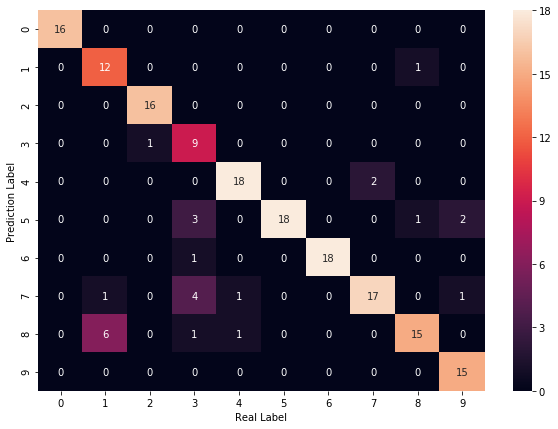

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:20 index:[5] real:5
#1 min_error:31 index:[3] real:2
#2 min_error:26 index:[8] real:8
#3 min_error:5 index:[0] real:0
#4 min_error:17 index:[1] real:1
#5 min_error:24 index:[7] real:7
#6 min_error:12 index:[6] real:6
#7 min_error:20 index:[3] real:3
#8 min_error:8 index:[2] real:2
#9 min_error:27 index:[1] real:1
#10 min_error:31 index:[7] real:7
#11 min_error:30 index:[7] real:4
#12 min_error:13 index:[6] real:6
#13 min_error:22 index:[3] real:3
#14 min_error:25 index:[1] real:1
#15 min_error:28 index:[3] real:3
#16 min_error:26 index:[7] real:9
#17 min_error:19 index:[1] real:1
#18 min_error:24 index:[7] real:7
#19 min_error:7 index:[6] real:6
#20 min_error:28 index:[8] real:8
#21 min_error:12 index:[4] real:4
#22 min_error:21 index:[3] real:3
#23 min_error:28 index:[1] real:1
#24 min_error:16 index:[4] real:4
#25 min_error:7 index:[0] real:0
#26 min_error:9 index:[5] real:5
#27 min_error:16 index:[3] real:3
#28 min_error:21 index:[6] real:6
#29 min_error:24 index:[9] re

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9066171923314781
Avg Base Learner:0.8146938775510203


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

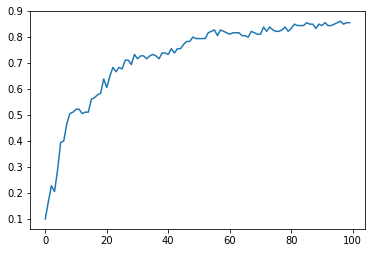

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2109 Total connections::2650
